<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Convolution%20Neural%20Network%20(CNN)%20Deep%20Learning%20Project%20using%20TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Network (CNN) | TensorFlow**


*   Diabetes Analysis
*   Usig TensorFlow


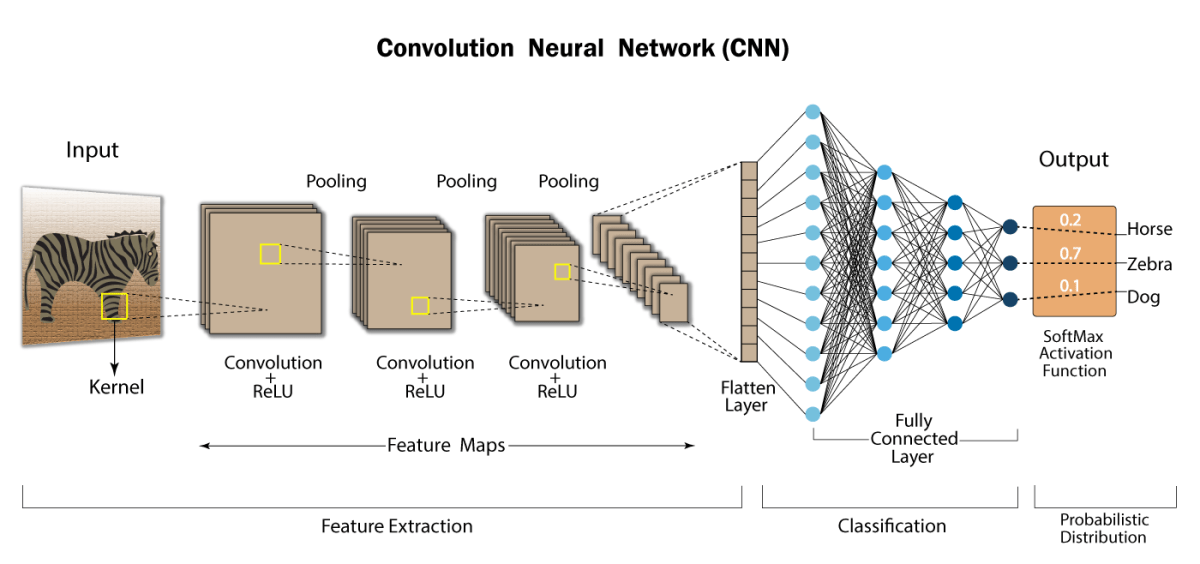

**Deep Learning Model Life Cycle**
A model has life cycle and this very knowlege provides the backbone for both modeling.
The Five Steps in the life cycle are as follow

* Define the Model   
* Compile the Model
*   Fit the Model
*   Evaluate the Model
*   Make the predictions


In [ ]:
!pip install tensorflow

In [ ]:
from ast import mod
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

#fix random seed for reproducibility
np.random.seed(7)

#------------------Model - 1 ------------------------------------
dataset=numpy.loadtxt("pima-indians-diabetes.csv",delimiter=",")
#split into  input(X) and ouput(Y) varibles
X=dataset[:,0:8]
Y=dataset[:,8]
print(X)
print(Y)
#Create the model
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [ ]:
#-----------Model-2------------------
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#Fit the model
model.fit(X,Y,epochs=150,batch_size=10)
#evaluate the model
scores=model.evaluate(X,Y)
print("\n%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 13.4543 - accuracy: 0.4232
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 2.5253 - accuracy: 0.6276
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.2587 - accuracy: 0.6497
Epoch 4/150
77/77 [==============================] - 0s 4ms/step - loss: 1.0454 - accuracy: 0.6380
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9281 - accuracy: 0.6354
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8361 - accuracy: 0.6341
Epoch 7/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7885 - accuracy: 0.6536
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7332 - accuracy: 0.6393
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.6367
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6393
Epoch 11

In [ ]:
#---------Model-3----------------------------
#serialize model to JSON
model_json=model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)
#serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#---------Model-4---------------------------------
#load json and create model
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

#load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
#-----------Model-5-------------
#evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
score=loaded_model.evaluate(X,Y,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

accuracy: 78.78%


**Develop Convolution Neural Network Modes**
A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data. CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series, and signal data.

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot


**Load Dataset**

In [ ]:
(trainx,trainy),(testx,testy)=load_data()



**Summarize the Dataset**

In [ ]:
print("Train =",trainx.shape,trainy.shape)
print("Test =",testx.shape,testy.shape)

Train = (60000, 28, 28) (60000,)
Test = (10000, 28, 28) (10000,)


**Plot few Images**

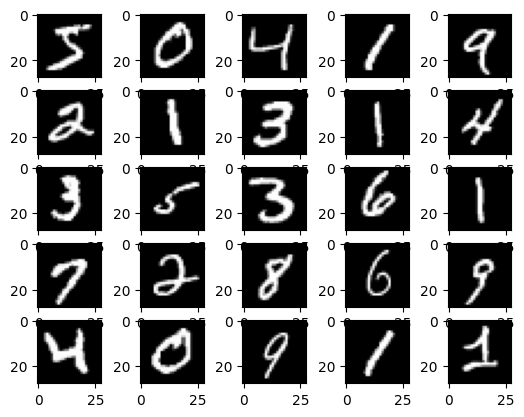

In [ ]:
for i in range(25):
  pyplot.subplot(5,5,i+1)
  pyplot.imshow(trainx[i],cmap=pyplot.get_cmap('gray'))
pyplot.show()

**CIFAR Dataset Image Classification using CNN**
This dataset is provides so Many Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

data=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=data.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


**Show Dataset**

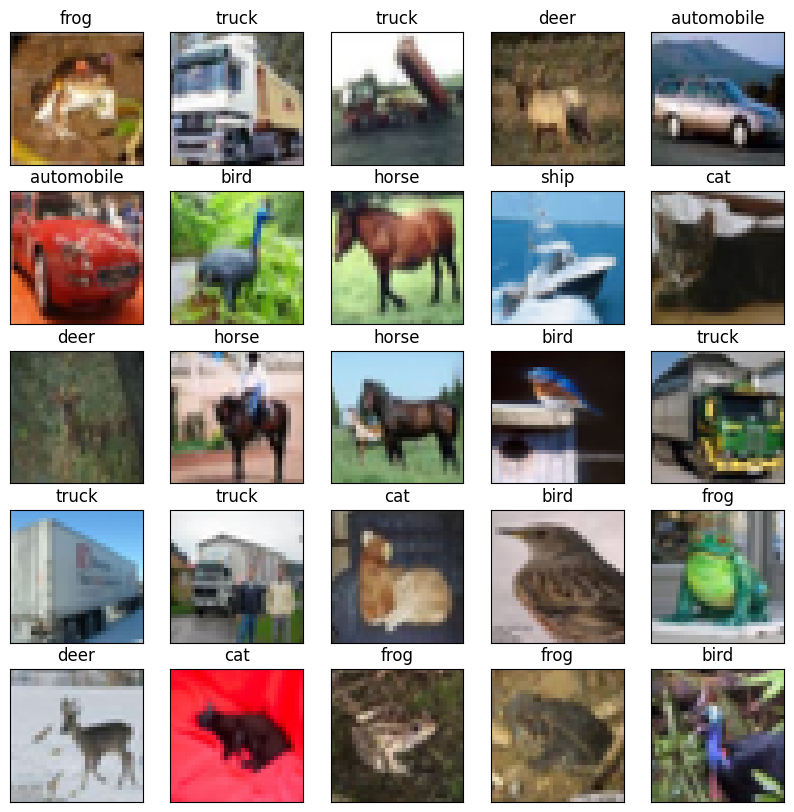

In [ ]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig,axes=plt.subplots(5,5,figsize=(10,10))
idex=0
for i in range(5):
  for j in range(5):
    axes[i,j].set_title(labels[y_train[idex][0]])
    axes[i,j].imshow(x_train[idex])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    idex+=1
plt.show()

**Normalization for Training and Testing**

In [ ]:
X_train=x_train/255
X_test=x_test/255
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


**Encoding**

In [ ]:
!pip install keras

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
y_train

array([[[[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
    

**Complie Training Model**

In [ ]:
import numpy as np

# Example data preparation
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



**Build The Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Initialize the model
model = keras.Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout Layer
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=10, activation='softmax'))

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
782/782 [==============================] - 449s 568ms/step - loss: 1.4553 - accuracy: 0.4821 - val_loss: 1.0535 - val_accuracy: 0.6110
Epoch 2/10
782/782 [==============================] - 442s 565ms/step - loss: 0.9970 - accuracy: 0.6485 - val_loss: 0.9042 - val_accuracy: 0.6800
Epoch 3/10
782/782 [==============================] - 448s 574ms/step - loss: 0.8287 - accuracy: 0.7084 - val_loss: 0.8288 - val_accuracy: 0.7099
Epoch 4/10
782/782 [==============================] - 458s 586ms/step - loss: 0.7273 - accuracy: 0.7474 - val_loss: 0.6759 - val_accuracy: 0.7627
Epoch 5/10
782/782 [==============================] - 458s 585ms/step - loss: 0.6518 - accuracy: 0.7735 - val_loss: 0.6903 - val_accuracy: 0.7660
Epoch 6/10
782/782 [==============================] - 465s 595ms/step - loss: 0.5923 - accuracy: 0.7962 - val_loss: 0.6035 - val_accuracy: 0.7956
Epoch 7/10
782/782 [==============================] - 439s 561ms/step - loss: 0.5335 - accuracy: 0.8152 - val_loss: 0.6022 -

In [ ]:
predictions = model.predict(X_test)
print('Test Accuracy',predictions)

313/313 [==============================] - 37s 116ms/step


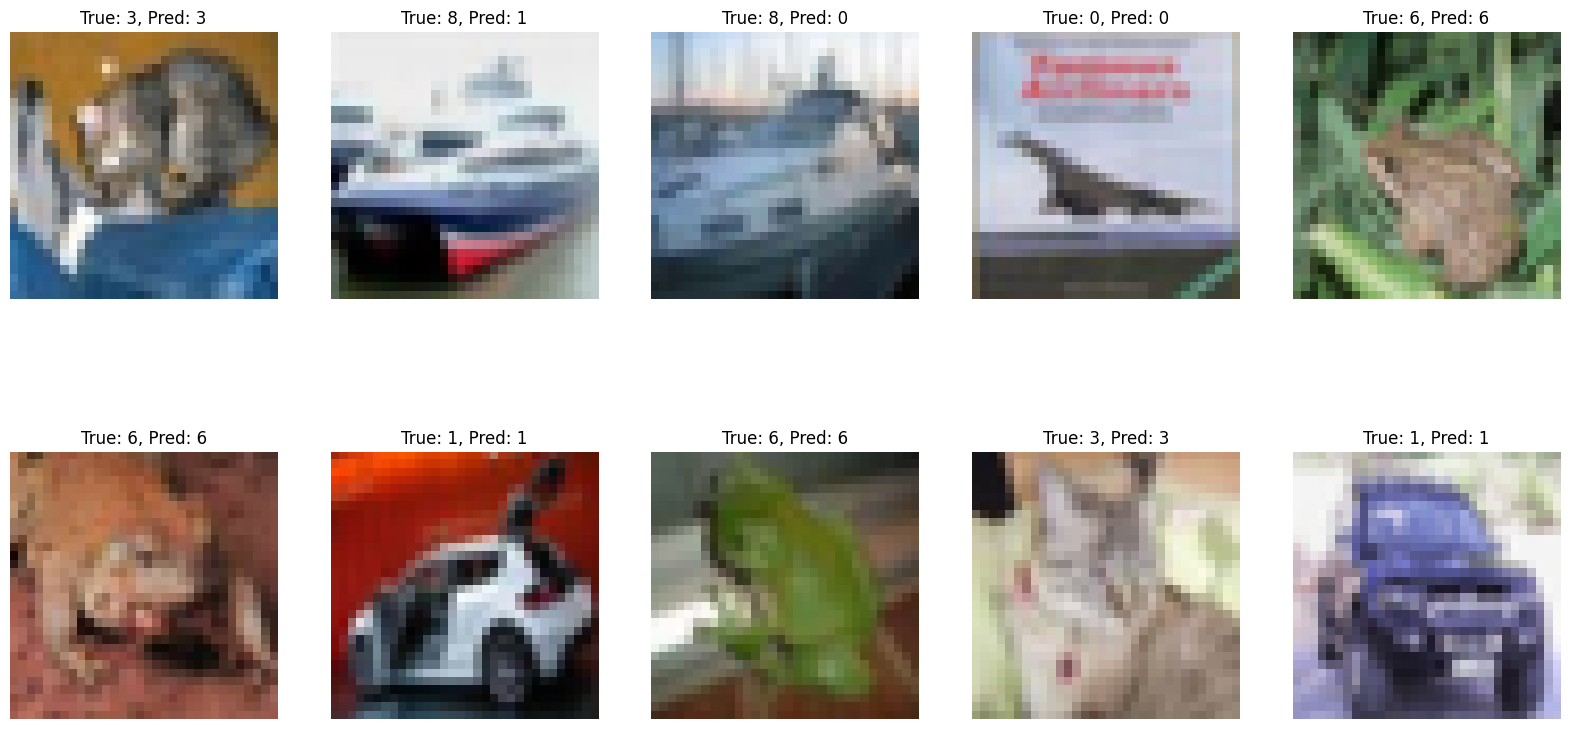

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = model.predict(X_test)

# Get the class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Define a function to plot images along with their labels
def plot_images(images, true_labels, predicted_labels, n=10):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(2, n // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

# Display some test images along with their true and predicted labels
plot_images(X_test, true_classes, predicted_classes, n=10)
